In [1]:
#Import libraries
import requests
import pydot
import pandas as pd


#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
print(tf.__version__)

2023-06-22 17:03:16.822615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


# 1. Load the Dataset
We are going to use one dataset from UCI Machine Learning Repository. You can download the Energy Efficient Dataset using the following link. You can use pandas to download and open the data set which is in excel format or load from your local machine.

In [6]:
#url dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

#read in excel format
df = pd.read_excel(URL)

print("From web")

df.head()

From web


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# 2. Overview of data


In [7]:
# Data summary
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
# Dimension of the dataset
df.shape

(768, 10)

In [9]:
# Check info about missing values in dataframe
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# Exploratory Data Analysis


# Data preparation


1.   Convert dataframe to numpy array for flexibility.
2. Split our data into training and testing datasets and store the target values in different variables.
3.   Normalize the features by applying some operations in the data sets.




In [11]:
# Convert to numpy array
numpy_dataset= df.values

dataset_x = numpy_dataset[:, :8]
dataset_y = numpy_dataset[:, 8:]

In [14]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size = 0.15)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size= 0.15)

print('train')
print(x_train.shape, y_train.shape)

print('validate')
print(x_validate.shape, y_validate.shape)

print('test')
print(x_test.shape, y_test.shape)

# separate y's to Y1 and Y2 for segregation
Y1_train, Y2_train = y_train[:, 0], y_train[:, 1]
Y1_test, Y2_test = y_test[:, 0], y_test[:, 1]
Y1_validate, Y2_validate = y_validate[:, 0], y_validate[:, 1]

output_train = [Y1_train, Y2_train]
output_test = [Y1_test, Y2_test]

train
(554, 8) (554, 2)
validate
(98, 8) (98, 2)
test
(116, 8) (116, 2)


In [15]:
#Normalizing the data set
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_validate_norm = (x_validate-x_validate.mean())/x_validate.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()

# Hyperparameter Tuning of DNN Model
* Input features: 8
* Output targets: 2


In [16]:
import shutil
# Delete tuning archive
shutil.rmtree('my_directory')

FileNotFoundError: [Errno 2] No such file or directory: 'my_directory'

In [20]:
from keras import layers, Sequential
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=64, step=4),
                           activation='relu',
                           input_shape=(8,)))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=64, step=16),
                           activation='relu'))
    model.add(layers.BatchNormalization())

    # model.add(layers.Dense(units=hp.Int('units_3', min_value=8, max_value=16, step=2),
    #                        activation='relu'))
    # model.add(layers.BatchNormalization())

    model.add(layers.Dense(2))  # Output layer with 2 neurons for regression
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='mse',
                  metrics = tf.keras.metrics.RootMeanSquaredError()
                  )
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective= 'val_loss',
    max_trials=20,  # Number of hyperparameter combinations to try
    executions_per_trial=4,  # Number of models to train for each trial
    directory='my_directory',  # Directory to store the tuning results
    project_name='my_project'  # Name of the tuning project
)

# Perform the hyperparameter search
tuner.search(x_train_norm,
              (Y1_train, Y2_train),
              validation_data=(x_validate_norm, (Y1_validate, Y2_validate)),
             epochs=10)

Trial 20 Complete [00h 00m 24s]
val_loss: 480.6689758300781

Best val_loss So Far: 139.63580131530762
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [21]:
from keras.api._v2.keras import callbacks
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Define the early stopping callback
# early_stopping = EarlyStopping(monitor='loss', patience=100, mode='min', verbose=1)

# fitting on best model
history = best_model.fit(x_train_norm, (Y1_train, Y2_train),
                    epochs = 2000,
                    validation_data = (x_validate_norm, (Y1_validate, Y2_validate)),
                    # callbacks = [early_stopping],
                    verbose = 1)

Epoch 1/2000
18/18 [==============================] - 3s 27ms/step - loss: 19.0177 - root_mean_squared_error: 4.3609 - val_loss: 122.9674 - val_root_mean_squared_error: 11.0891
Epoch 2/2000
18/18 [==============================] - 0s 15ms/step - loss: 18.9257 - root_mean_squared_error: 4.3504 - val_loss: 224.7641 - val_root_mean_squared_error: 14.9921
Epoch 3/2000
18/18 [==============================] - 0s 10ms/step - loss: 16.5344 - root_mean_squared_error: 4.0662 - val_loss: 340.3940 - val_root_mean_squared_error: 18.4498
Epoch 4/2000
18/18 [==============================] - 0s 11ms/step - loss: 15.1748 - root_mean_squared_error: 3.8955 - val_loss: 379.3987 - val_root_mean_squared_error: 19.4782
Epoch 5/2000
18/18 [==============================] - 0s 9ms/step - loss: 17.7243 - root_mean_squared_error: 4.2100 - val_loss: 527.5847 - val_root_mean_squared_error: 22.9692
Epoch 6/2000
18/18 [==============================] - 0s 12ms/step - loss: 14.4345 - root_mean_squared_error: 3.7993

In [22]:
#testing on validation set process
loss, rmse = best_model.evaluate(x = x_validate_norm, y = (Y1_validate, Y2_validate))
print(f"Loss = {loss}, RMSE = {rmse}" )

4/4 [==============================] - 0s 11ms/step - loss: 136.7569 - root_mean_squared_error: 11.6943
Loss = 136.75689697265625, RMSE = 11.694310188293457


In [23]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [24]:
def plot_line(metric_1,metric_2, title, label1, label2):
    plt.figure(figsize=(8,3))
    plt.title(title, fontsize = 16)
    plt.plot(metric_1, label = label1)
    plt.plot(metric_2, label = label2)
    plt.xlabel("Epochs", fontsize = 14)
    plt.grid()
    plt.legend(loc= "best")

def scatter_plot(true, predictions, title):
    plt.figure(figsize=(8,3))
    plt.scatter(predictions, true)
    plt.title(title, fontsize = 16)
    plt.xlabel("Predictions", fontsize = 14)
    plt.ylabel("Real", fontsize = 14)
    plt.grid()

loss = history.history["loss"]

val_loss = history.history["val_loss"]

root_mean_squared_error = history.history["root_mean_squared_error"]
val_root_mean_squared_error = history.history["val_root_mean_squared_error"]


/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/matplotlib/font_manager.py:282: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  timer = Timer(5, lambda: warnings.warn(
Fontconfig warning: ignoring UTF-8: not a valid region tag


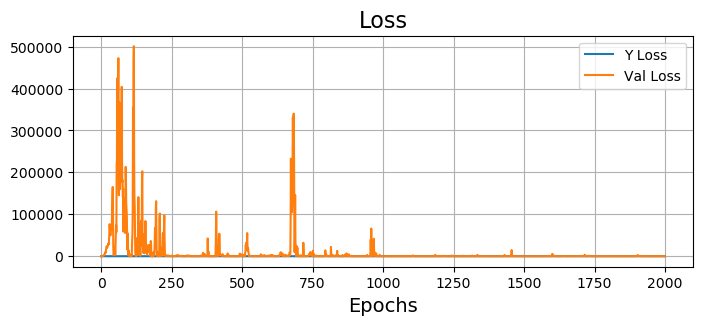

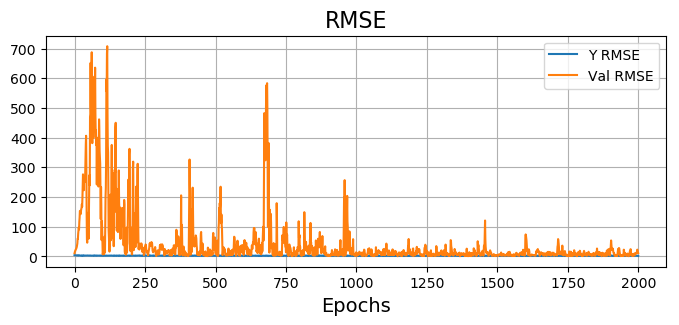

In [25]:
plot_line(loss, val_loss, title ="Loss", label1 = "Y Loss", label2 = "Val Loss")
plot_line(root_mean_squared_error, val_root_mean_squared_error, title ="RMSE", label1 = "Y RMSE", label2 = "Val RMSE")

#Predictions

In [26]:
Y_pred = best_model.predict(x_test_norm)
print(Y_pred - y_test)

4/4 [==============================] - 1s 6ms/step
[[ -19.08605148  -22.89710308]
 [ -22.1662735   -25.59821718]
 [ -18.14384273  -21.83003434]
 [ -19.01826467  -22.47663495]
 [ -18.47689438  -28.8100161 ]
 [ -18.52072539  -21.86632119]
 [ -22.68309639  -28.29055199]
 [ -15.57419842  -20.15232056]
 [ -15.94537565  -19.22517719]
 [ -25.35172211  -28.13370884]
 [ -20.91135233  -24.91327652]
 [ -15.44561529  -17.64352775]
 [ -16.01595108  -17.97820705]
 [ -87.79696472  -89.44994659]
 [ -11.19438619  -14.33684912]
 [ -18.55088572  -18.48327232]
 [ -20.26227718  -19.79509449]
 [ -18.17849523  -21.13438643]
 [ -49.82844238  -54.7604924 ]
 [ -22.58323654  -22.27199615]
 [ -25.44171524  -31.62587346]
 [ -23.18518379  -20.6792112 ]
 [ -22.16010109  -22.40330723]
 [ -21.32728315  -22.90530443]
 [ -13.76008034  -17.20103729]
 [ -14.84447002  -14.62656944]
 [ -18.34789829  -24.03115192]
 [ -59.81100525  -62.03977066]
 [ -18.31036747  -19.72183863]
 [ -18.57481945  -19.68061459]
 [ -85.36414429  -8

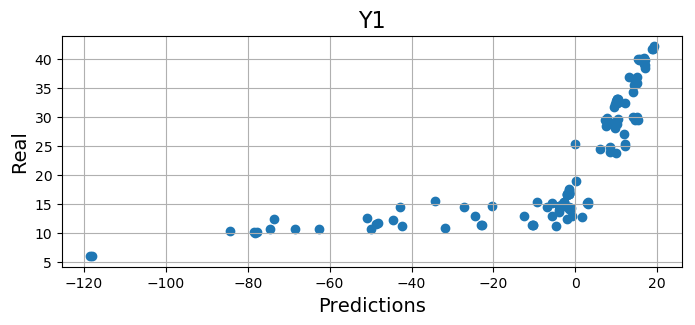

In [27]:
scatter_plot(y_test[:,0], Y_pred[:,0], "Y1")

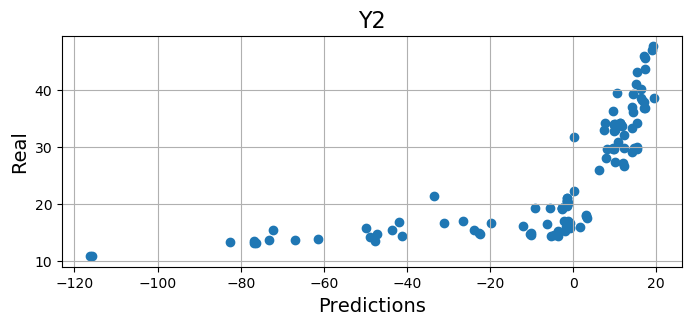

In [28]:
scatter_plot(y_test[:,1], Y_pred[:,1], "Y2")